In [211]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn import naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [212]:
data_clean = pd.read_csv('data_emotion_clean - Copy.csv', encoding='latin1')

# data_clean = data_clean.drop(columns=['Category', 'Product Name', 'Location', 'Price', 'Overall Rating', 'Number Sold', 'Total Review'])
# exclude_labels = ['Happy']
# data_clean = data_clean[~data_clean['Emotion'].isin(exclude_labels)]
label = '2nd Emotion'
data_clean.head()

,Customer Review,Emotion,2nd Emotion
0,alhamdulillah fungsi packaging aman respon cep...,Happy,Positive
1,barang bagus respon cepat harga saing yg,Happy,Positive
2,barang bagus fungsi seler ramah kirim cepat,Happy,Positive
3,bagus sesuai harap jual nya ramah trimakasih l...,Happy,Positive
4,barang bagus emas aman fungsi,Happy,Positive


In [213]:
kelas_emosi = []
emosi_cleans = data_clean[label].astype('U')
for ke, emosi in enumerate(emosi_cleans):
    if emosi not in kelas_emosi:
        kelas_emosi.append(emosi)
kelas_emosi = sorted(kelas_emosi)

print(kelas_emosi)

['Negative', 'Positive']


In [214]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Customer Review'].astype('U'))
# print(text_tf)
x_train, x_test, y_train, y_test = train_test_split(
    text_tf, data_clean[label], 
    test_size = 0.3, random_state = 42)

# print(text_tf.shape)

# print(x_train)
print(y_test)

# df1 = pd.DataFrame(text_tf.toarray(),columns=tf.get_feature_names_out())
# pd.set_option('display.max_rows',10)
# df1
# print(f'Number of Anger testing Data: {format(sum(y_test == "Anger"))}')
# print(f'Number of Fear testing Data: {format(sum(y_test == "Fear"))}')
# print(f'Number of Happy testing Data: {format(sum(y_test == "Happy"))}')
# print(f'Number of Love testing Data: {format(sum(y_test == "Love"))}')
# print(f'Number of Sadness testing Data: {format(sum(y_test == "Sadness"))}')
# print('\n')
# print(f'Number of testing Data: {format(y_test.count())}')



2476    Positive
1047    Negative
3164    Negative
2372    Positive
2107    Negative
          ...   
4679    Positive
1451    Negative
4241    Positive
1116    Negative
1541    Positive
Name: 2nd Emotion, Length: 1620, dtype: object


In [215]:
def predicted_emotion(clf):
    predicted = clf.predict(x_test)
    
    print("Accuracy: ", accuracy_score(y_test, predicted))
    print("Recall: ", recall_score(y_test,predicted, average='macro'))
    print("Precision: ", precision_score(y_test,predicted, average='macro'))
    # print("F1 Score: ", f1_score(y_test, predicted, average='macro'))
    print('\n')

    cm = confusion_matrix(y_test, predicted)
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=kelas_emosi,
            yticklabels=kelas_emosi)
    plt.xlabel('Prediction', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()
    print('\n')
    print(classification_report(y_test, predicted, zero_division = 0))

Accuracy:  0.9018518518518519
Recall:  0.9017767271618118
Precision:  0.9018018512671984




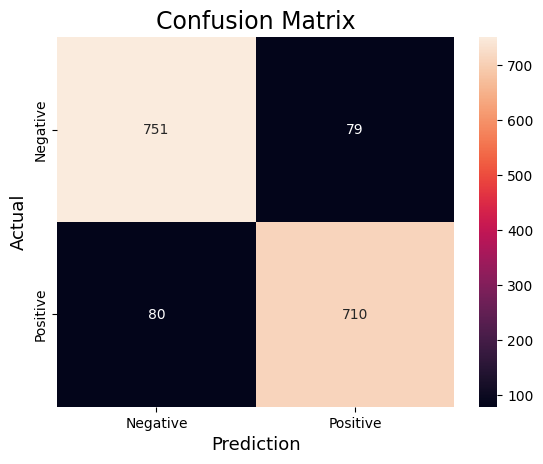



              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90       830
    Positive       0.90      0.90      0.90       790

    accuracy                           0.90      1620
   macro avg       0.90      0.90      0.90      1620
weighted avg       0.90      0.90      0.90      1620



In [216]:
clf = naive_bayes.MultinomialNB().fit(
    x_train, y_train)
predicted_emotion(clf)